In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset/Position_Salaries.csv')

In [3]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = data.iloc[:,1:2].values
X.shape

(10, 1)

In [5]:
y = data.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [6]:
from sklearn.linear_model import LinearRegression

### fitting with Linear Regression

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### fitting with Polynomial Regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly_reg = PolynomialFeatures(degree=3)  #3,4
X_poly = poly_reg.fit_transform(X)

In [10]:
poly_reg.degree

3

In [11]:
pd.DataFrame(X).head()

,0
0,1
1,2
2,3
3,4
4,5


In [12]:
import pandas as pd
df = pd.DataFrame(X_poly)
df.head()


,0,1,2,3
0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0
2,1.0,3.0,9.0,27.0
3,1.0,4.0,16.0,64.0
4,1.0,5.0,25.0,125.0


In [13]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### visualization linear regression result

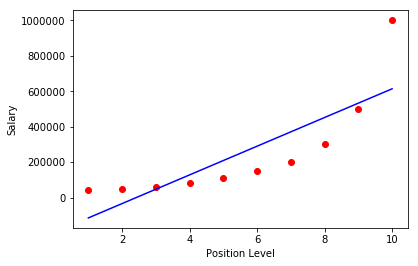

In [14]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### visualization Polynomial regression result

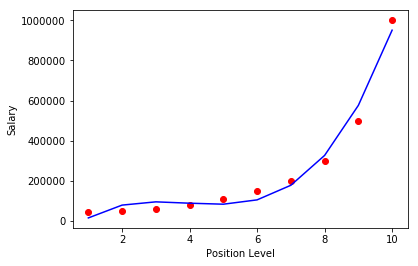

In [15]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Prediction with Linear Regression

In [16]:
lin_reg.predict(6.5)

array([ 330378.78787879])

### Prediction with Polynomial Regression

In [17]:
lin_reg2.predict(poly_reg.fit_transform(6.5))

array([ 133259.46969697])

In [18]:
from sklearn.metrics import r2_score
for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)  #3,4
    X_poly = poly_reg.fit_transform(X)
    
    lin_reg2 = LinearRegression()
    lin_reg2.fit(X_poly,y)
    print 'for power %d'%i
    #print lin_reg2.predict(poly_reg.fit_transform(6.5))
    print 'score:',r2_score(y,lin_reg2.predict(X_poly))

for power 1
score: 0.669041233193
for power 2
score: 0.916208222144
for power 3
score: 0.981209772791
for power 4
score: 0.997392289171
for power 5
score: 0.99979690271


In [19]:
from sklearn.metrics import r2_score